Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

sns.set()
plt.style.use('ggplot')
%matplotlib inline


# Load Dataset

In [2]:
def load_data(file_path):
    return pd.read_csv(file_path)

# Load datasets
df = load_data("titanic.csv")
print(df.shape)  # (891, 12)


(891, 12)


In [3]:
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv('titanic.csv')

# Method 1: Using isnull() and sum()
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

'''
  Method 2: Using isna() and sum()
  missing_values_na = df.isna().sum()
  print("Missing values in each column (using isna()):\n", missing_values_na)

  # Method 3: Using info()
  print("\nDataFrame info:\n")
  df.info()

  # Method 4: Using isnull().any()
  missing_values_any = df.isnull().any()
  print("\nAre there any missing values in each column?\n", missing_values_any)

  # Method 5: Using isnull().sum().sum()
  total_missing_values = df.isnull().sum().sum()
  print("\nTotal number of missing values in the DataFrame:\n", total_missing_values)'''


Missing values in each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


' \n  Method 2: Using isna() and sum()\n  missing_values_na = df.isna().sum()\n  print("Missing values in each column (using isna()):\n", missing_values_na)\n\n  # Method 3: Using info()\n  print("\nDataFrame info:\n")\n  df.info()\n\n  # Method 4: Using isnull().any()\n  missing_values_any = df.isnull().any()\n  print("\nAre there any missing values in each column?\n", missing_values_any)\n\n  # Method 5: Using isnull().sum().sum()\n  total_missing_values = df.isnull().sum().sum()\n  print("\nTotal number of missing values in the DataFrame:\n", total_missing_values)'

# Dropping Columns which are not useful

In [4]:
df['Embarked'][df['Embarked'].isnull()]
df['Embarked'][df['Embarked'].isnull()] = df['Embarked'].dropna().mode().values

In [5]:
cols = ['Name', 'Ticket', 'Cabin']
df = df.drop(cols, axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [7]:
print(df.shape)

(891, 9)


# Dropping rows having missing values

In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Sex          714 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        714 non-null    int64  
 6   Parch        714 non-null    int64  
 7   Fare         714 non-null    float64
 8   Embarked     714 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 55.8+ KB


In [10]:
df.shape


(714, 9)

# Problem with dropping rows having missing values
After dropping rows with missing values we find that the dataset is reduced to 712 rows from 891, which means we are wasting data. Machine learning models need data for training to perform well. So we preserve the data and make use of it as much as we can. We will see it later.

**Creating Dummy Variables**

In [11]:
dummies = []
cols = ['Pclass', 'Sex', 'Embarked']
for col in cols:
    dummies.append(pd.get_dummies(df[col]))


In [12]:
titanic_dummies = pd.concat(dummies, axis=1)

In [13]:
df = pd.concat((df,titanic_dummies), axis=1)

In [14]:
# Check the current columns of df
print(df.columns)

# List of columns to drop
columns_to_drop = ['Pclass', 'Sex', 'Embarked']

# Check if columns_to_drop exist in df.columns
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop the columns if they exist
df = df.drop(columns=columns_to_drop, axis=1)

# Now df should have dropped the specified columns if they were present


Index(['PassengerId',    'Survived',      'Pclass',         'Sex',
               'Age',       'SibSp',       'Parch',        'Fare',
          'Embarked',             1,             2,             3,
            'female',        'male',           'C',           'Q',
                 'S'],
      dtype='object')


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Age          714 non-null    float64
 3   SibSp        714 non-null    int64  
 4   Parch        714 non-null    int64  
 5   Fare         714 non-null    float64
 6   1            714 non-null    bool   
 7   2            714 non-null    bool   
 8   3            714 non-null    bool   
 9   female       714 non-null    bool   
 10  male         714 non-null    bool   
 11  C            714 non-null    bool   
 12  Q            714 non-null    bool   
 13  S            714 non-null    bool   
dtypes: bool(8), float64(2), int64(4)
memory usage: 44.6 KB


In [16]:
df.shape

(714, 14)

In [17]:
df.isnull().sum()


PassengerId    0
Survived       0
Age            0
SibSp          0
Parch          0
Fare           0
1              0
2              0
3              0
female         0
male           0
C              0
Q              0
S              0
dtype: int64

<Axes: ylabel='count'>

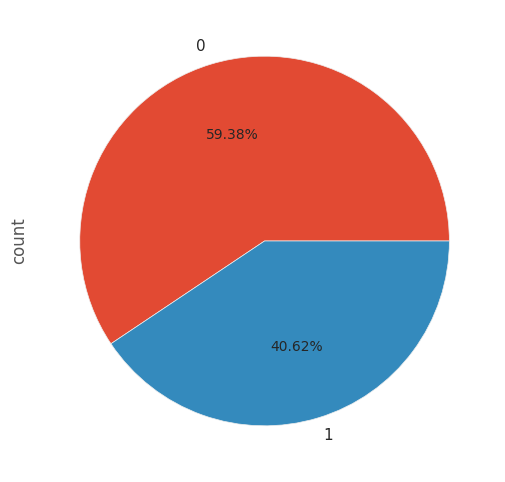

In [18]:
# First look at the overall survival ratio
fig = plt.figure(figsize=(6,6))
df['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')

In [19]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,80.000000,5.000000,6.000000,512.329200


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Age          714 non-null    float64
 3   SibSp        714 non-null    int64  
 4   Parch        714 non-null    int64  
 5   Fare         714 non-null    float64
 6   1            714 non-null    bool   
 7   2            714 non-null    bool   
 8   3            714 non-null    bool   
 9   female       714 non-null    bool   
 10  male         714 non-null    bool   
 11  C            714 non-null    bool   
 12  Q            714 non-null    bool   
 13  S            714 non-null    bool   
dtypes: bool(8), float64(2), int64(4)
memory usage: 44.6 KB


In [21]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 PassengerId    0
Survived       0
Age            0
SibSp          0
Parch          0
Fare           0
1              0
2              0
3              0
female         0
male           0
C              0
Q              0
S              0
dtype: int64


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Age          714 non-null    float64
 3   SibSp        714 non-null    int64  
 4   Parch        714 non-null    int64  
 5   Fare         714 non-null    float64
 6   1            714 non-null    bool   
 7   2            714 non-null    bool   
 8   3            714 non-null    bool   
 9   female       714 non-null    bool   
 10  male         714 non-null    bool   
 11  C            714 non-null    bool   
 12  Q            714 non-null    bool   
 13  S            714 non-null    bool   
dtypes: bool(8), float64(2), int64(4)
memory usage: 44.6 KB


# Detect and Handle Outliers
Boxplot and IQR Method

In [23]:
# Function to calculate IQR and detect outliers
def outlier_thresholds(dataframe, col_name):
    quartile1 = dataframe[col_name].quantile(0.25)
    quartile3 = dataframe[col_name].quantile(0.75)
    interquartile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquartile_range
    low_limit = quartile1 - 1.5 * interquartile_range
    return low_limit, up_limit

# Function to replace outliers with thresholds
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

# Apply to numeric columns in Titanic dataset
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    replace_with_thresholds(df, col)




# Local Outlier Factor (LOF)

In [24]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Function to apply LOF
def apply_lof(dataframe, n_neighbors=20):
    clf = LocalOutlierFactor(n_neighbors=n_neighbors)
    dataframe['LOF_Score'] = clf.fit_predict(dataframe.select_dtypes(include=['float64', 'int64']))
    return dataframe

# Apply LOF to numerical columns
df = apply_lof(df)


# Remove LOF outliers
df = df[df['LOF_Score'] == 1].copy()


# Drop LOF score columns after filtering
df.drop('LOF_Score', axis=1, inplace=True)



# Feature Engineering

Creating a New Feature: FamilySize

In [25]:
#family size new feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


Creating a New Feature: IsAlone

In [26]:
df['IsAlone'] = 1  # Initialize to 1 (True)
df['IsAlone'].loc[df['FamilySize'] > 1] = 0  # If family size is greater than 1 -> not alone


Binning Age into Categories

In [27]:
# Define bins for age
bins = [0, 12, 20, 40, 60, 80]
labels = ['Child', 'Teenager', 'Adult', 'Middle-Aged', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)


Creating a Feature: FarePerPerson

In [28]:
# Fare per person is calculated by dividing Fare by FamilySize
df['FarePerPerson'] = df['Fare'] / df['FamilySize']


In [29]:
# Check the final DataFrame
df.head()


,PassengerId,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S,FamilySize,IsAlone,AgeGroup,FarePerPerson
0,1,0.0,22.0,1.0,0.0,7.2500,False,False,True,False,True,False,False,True,2.0,0,Adult,3.62500
1,2,1.0,38.0,1.0,0.0,71.2833,True,False,False,True,False,True,False,False,2.0,0,Adult,35.64165
2,3,1.0,26.0,0.0,0.0,7.9250,False,False,True,True,False,False,False,True,1.0,1,Adult,7.92500
3,4,1.0,35.0,1.0,0.0,53.1000,True,False,False,True,False,False,False,True,2.0,0,Adult,26.55000
4,5,0.0,35.0,0.0,0.0,8.0500,False,False,True,False,True,False,False,True,1.0,1,Adult,8.05000


# **Exploratory Data Analysis (EDA)**

In [30]:
# Titanic dataset
print(df.describe())
print(df.info())

       PassengerId    Survived         Age       SibSp       Parch  \
count   707.000000  707.000000  707.000000  707.000000  707.000000   
mean    448.284300    0.403112   29.483444    0.449081    0.388967   
std     258.926346    0.490870   14.135598    0.710272    0.706640   
min       1.000000    0.000000    0.420000    0.000000    0.000000   
25%     222.500000    0.000000   20.250000    0.000000    0.000000   
50%     447.000000    0.000000   28.000000    0.000000    0.000000   
75%     677.500000    1.000000   38.000000    1.000000    1.000000   
max     891.000000    1.000000   64.812500    2.500000    2.500000   

             Fare  FamilySize     IsAlone  FarePerPerson  
count  707.000000  707.000000  707.000000     707.000000  
mean    25.739839    1.838048    0.568600      16.014940  
std     22.032483    1.200039    0.495622      15.270534  
min      0.000000    1.000000    0.000000       0.000000  
25%      8.050000    1.000000    0.000000       7.699983  
50%     15.5000

PassengerId      0
Survived         0
Age              0
SibSp            0
Parch            0
Fare             0
1                0
2                0
3                0
female           0
male             0
C                0
Q                0
S                0
FamilySize       0
IsAlone          0
AgeGroup         0
FarePerPerson    0
dtype: int64


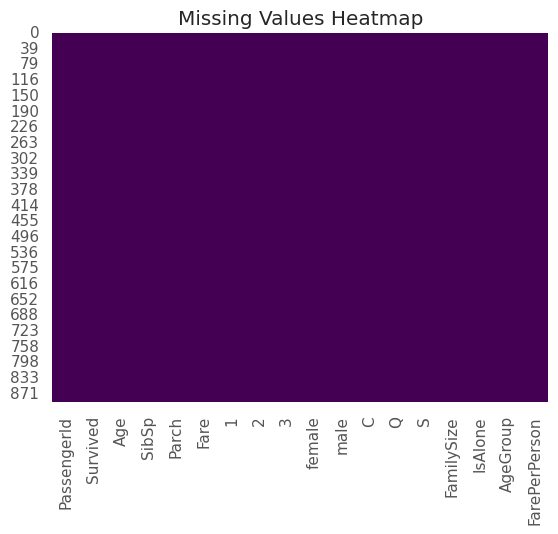

In [31]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


Checking For Missing Values

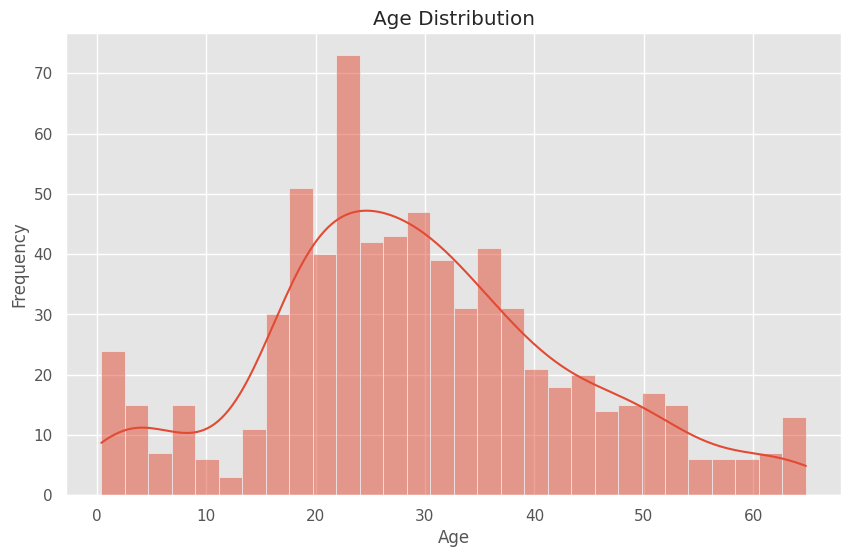

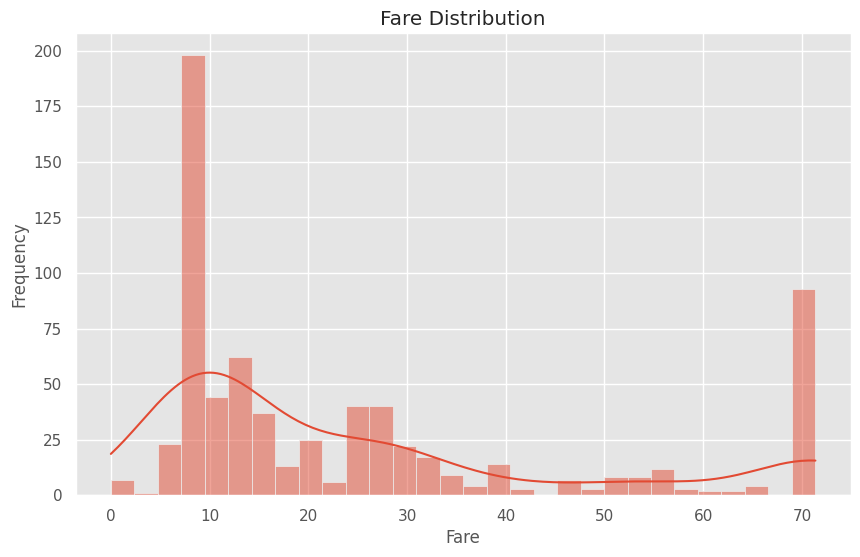

In [32]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Fare Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


Distribution Of Numerical Features

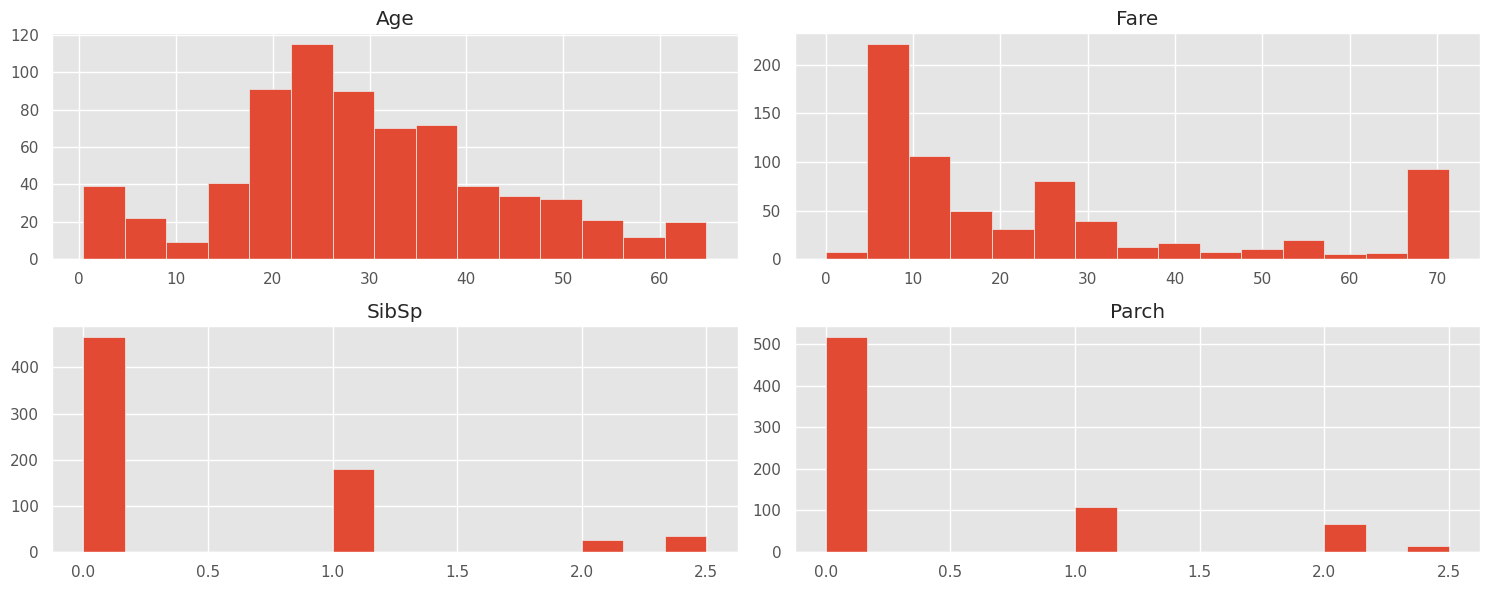

In [33]:

# Plot distribution of numerical features
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
df[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 2))
plt.tight_layout()
plt.show()


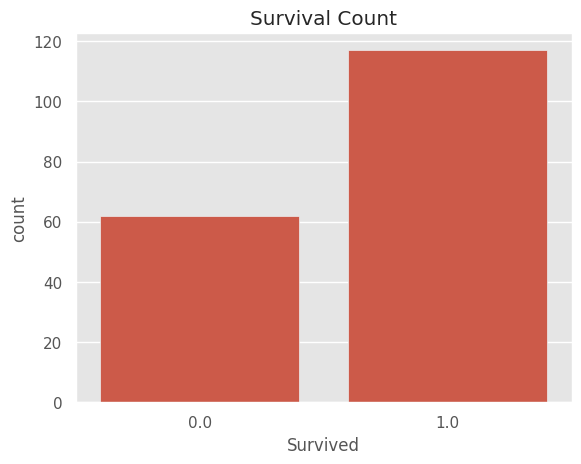

In [34]:
# Count plot for Survived feature
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()


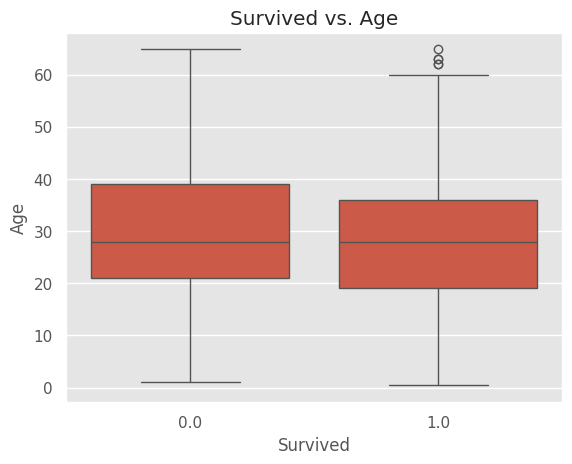

In [35]:
# Box plot for Age vs. Survived
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Survived vs. Age')
plt.show()


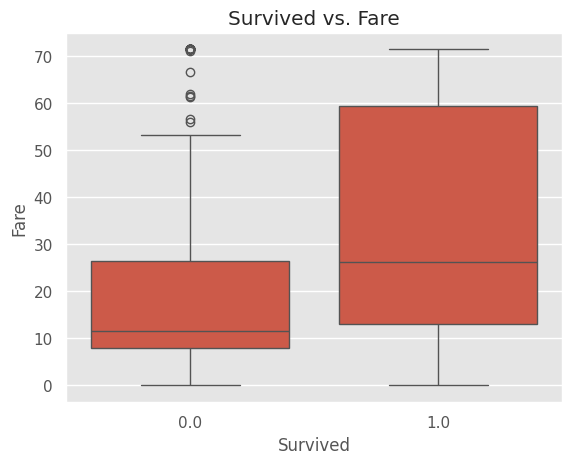

In [36]:
# Box plot for Fare vs. Survived
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Survived vs. Fare')
plt.show()


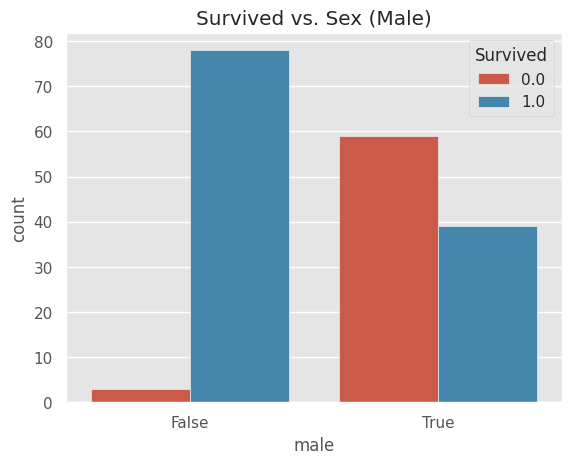

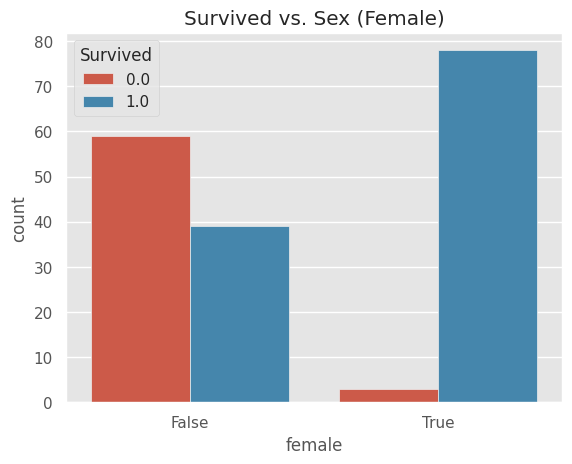

In [37]:
# Count plot for Survived vs. Sex
sns.countplot(x='male', hue='Survived', data=df)
plt.title('Survived vs. Sex (Male)')
plt.show()

sns.countplot(x='female', hue='Survived', data=df)
plt.title('Survived vs. Sex (Female)')
plt.show()


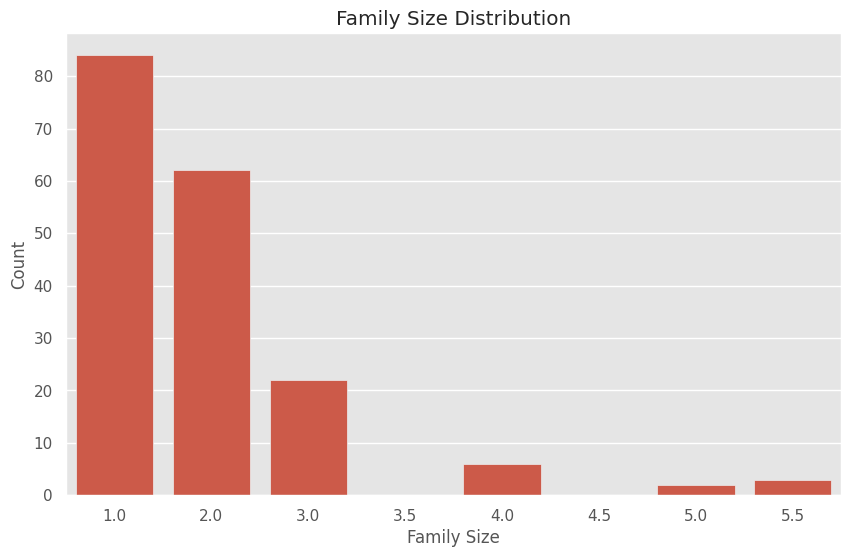

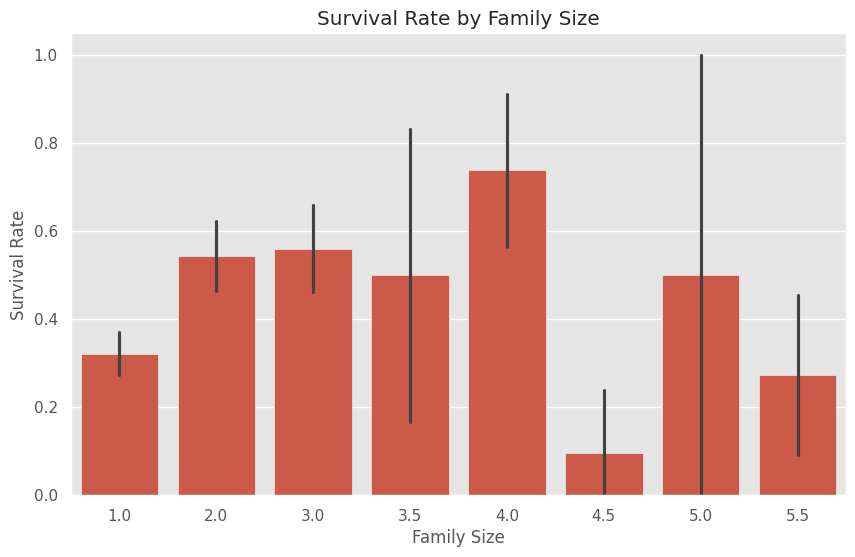

In [38]:
# Create FamilySize feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Visualize FamilySize distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='FamilySize')
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

# Survival Rate by Family Size
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='FamilySize', y='Survived')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()



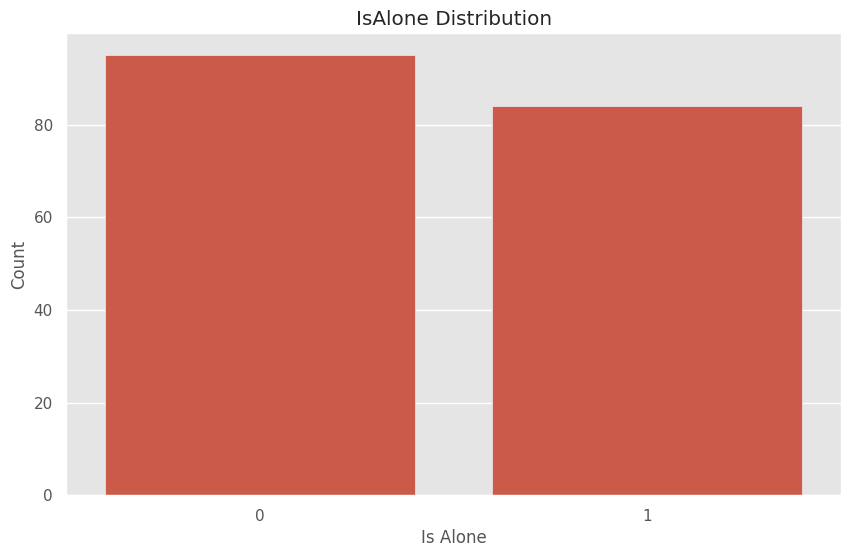

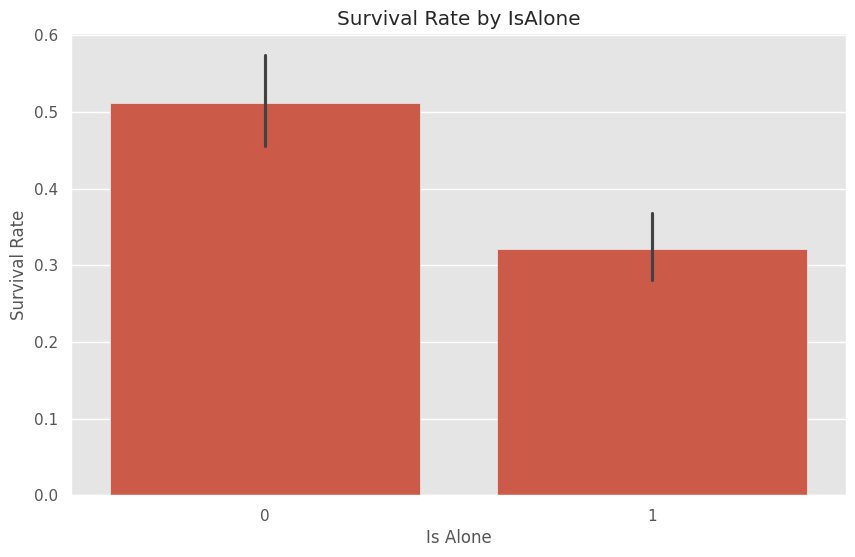

In [39]:
# Create IsAlone feature
df['IsAlone'] = 1  # Initialize to 1 (True)
df['IsAlone'].loc[df['FamilySize'] > 1] = 0  # If family size is greater than 1 -> not alone

# Visualize IsAlone distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='IsAlone')
plt.title('IsAlone Distribution')
plt.xlabel('Is Alone')
plt.ylabel('Count')
plt.show()

# Survival Rate by IsAlone
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='IsAlone', y='Survived')
plt.title('Survival Rate by IsAlone')
plt.xlabel('Is Alone')
plt.ylabel('Survival Rate')
plt.show()


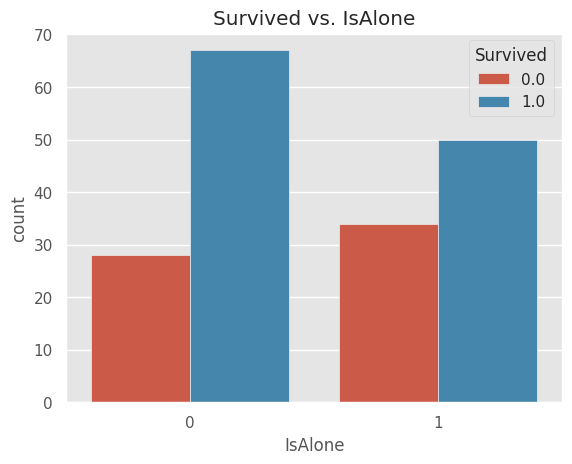

In [40]:
# Count plot for Survived vs. IsAlone
sns.countplot(x='IsAlone', hue='Survived', data=df)
plt.title('Survived vs. IsAlone')
plt.show()


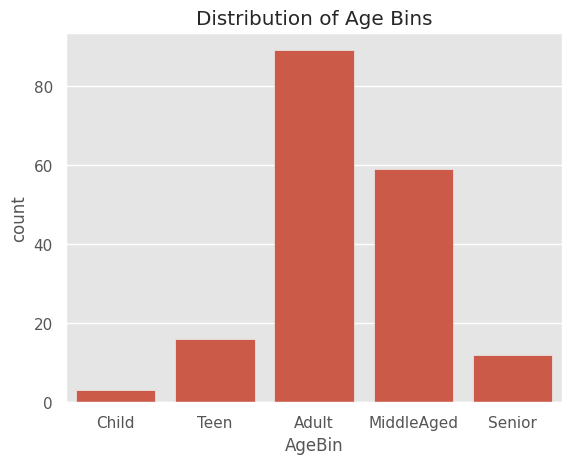

In [41]:
# Count plot for AgeBin
# Create Age bins
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teen', 'Adult', 'MiddleAged', 'Senior'])

sns.countplot(x='AgeBin', data=df)
plt.title('Distribution of Age Bins')
plt.show()


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 707 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    707 non-null    int64   
 1   Survived       707 non-null    float64 
 2   Age            707 non-null    float64 
 3   SibSp          707 non-null    float64 
 4   Parch          707 non-null    float64 
 5   Fare           707 non-null    float64 
 6   1              707 non-null    bool    
 7   2              707 non-null    bool    
 8   3              707 non-null    bool    
 9   female         707 non-null    bool    
 10  male           707 non-null    bool    
 11  C              707 non-null    bool    
 12  Q              707 non-null    bool    
 13  S              707 non-null    bool    
 14  FamilySize     707 non-null    float64 
 15  IsAlone        707 non-null    int64   
 16  AgeGroup       707 non-null    category
 17  FarePerPerson  707 non-null    float64 


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 707 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    707 non-null    int64   
 1   Survived       707 non-null    float64 
 2   Age            707 non-null    float64 
 3   SibSp          707 non-null    float64 
 4   Parch          707 non-null    float64 
 5   Fare           707 non-null    float64 
 6   1              707 non-null    bool    
 7   2              707 non-null    bool    
 8   3              707 non-null    bool    
 9   female         707 non-null    bool    
 10  male           707 non-null    bool    
 11  C              707 non-null    bool    
 12  Q              707 non-null    bool    
 13  S              707 non-null    bool    
 14  FamilySize     707 non-null    float64 
 15  IsAlone        707 non-null    int64   
 16  AgeGroup       707 non-null    category
 17  FarePerPerson  707 non-null    float64 


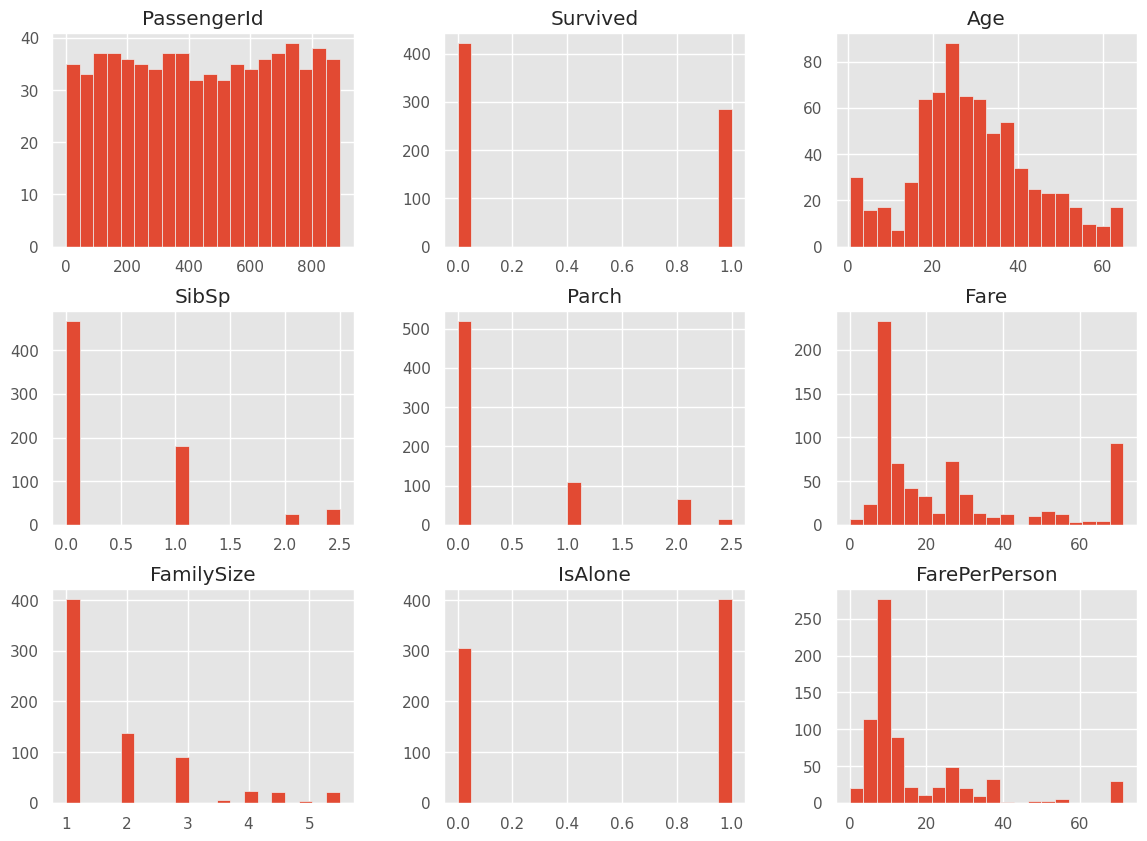

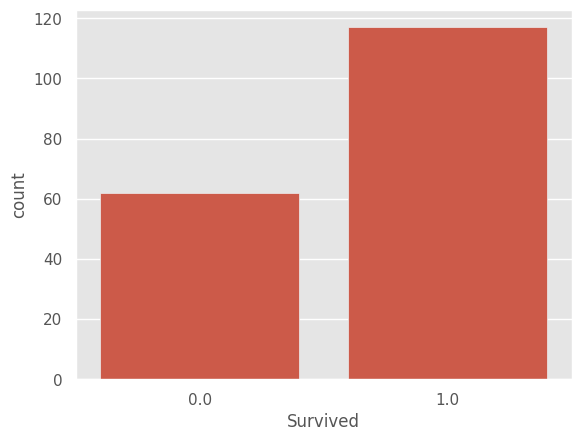

In [44]:
# Histograms for numerical variables
df.hist(bins=20, figsize=(14, 10))
plt.show()

# Count plots for categorical variables
sns.countplot(x='Survived', data=df)
plt.show()




#Bivariate Analysis

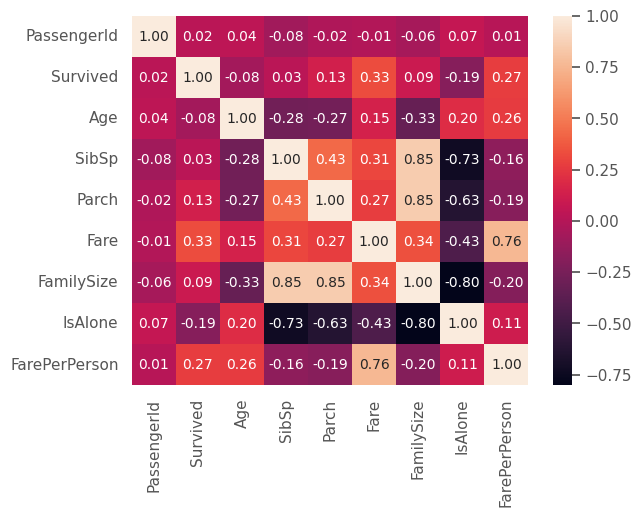

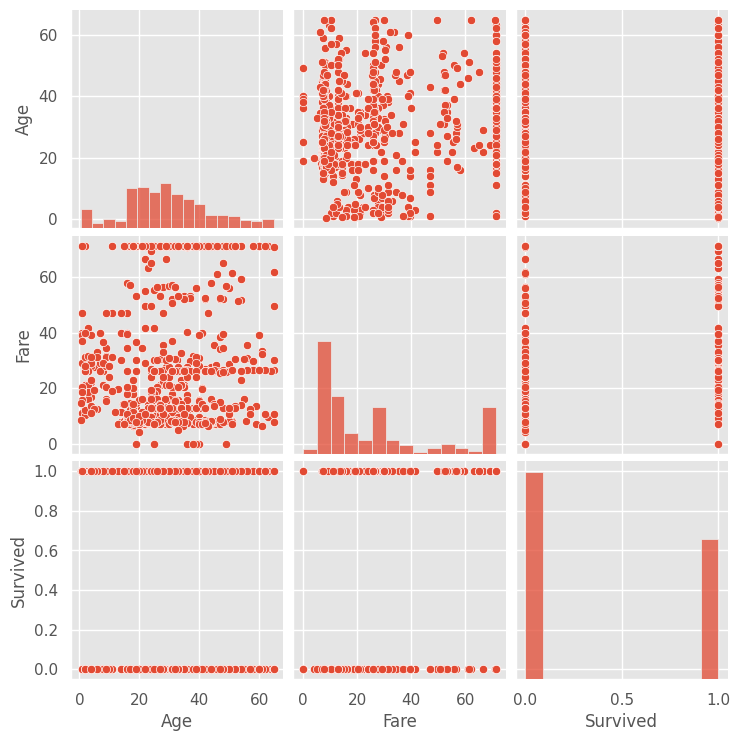

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation matrix
titanic_corr = df.select_dtypes(include=['float64', 'int64']).corr()

# Heatmap for Titanic dataset
sns.heatmap(titanic_corr, annot=True, fmt=".2f")
plt.show()



# Pairplot for selected features in Titanic dataset
sns.pairplot(df[['Age', 'Fare', 'Survived']])
plt.show()




#  Encoding Categorical Variables


In [46]:
import pandas as pd
import numpy as np

# Load Titanic dataset
df = pd.read_csv('titanic.csv')

# Feature: Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Feature: IsAlone
df['IsAlone'] = 1  # Initialize to 1
df.loc[df['FamilySize'] > 1, 'IsAlone'] = 0  # Set to 0 if FamilySize > 1

# Feature: Title Extraction
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
title_mapping = {
    'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Dr': 5, 'Rev': 6,
    'Major': 7, 'Col': 8, 'Mlle': 9, 'Mme': 10, 'Ms': 11, 'Lady': 12,
    'Sir': 13, 'Capt': 14, 'Countess': 15, 'Jonkheer': 16, 'Don': 17
}
df['Title'] = df['Title'].map(title_mapping).fillna(0)

# Feature: Fare Per Person
df['FarePerPerson'] = df['Fare'] / df['FamilySize']

# Feature: Age Groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 120], labels=[0, 1, 2, 3, 4])

# Feature: Cabin Deck
df['CabinDeck'] = df['Cabin'].apply(lambda x: str(x)[0] if pd.notnull(x) else 'U')

# Check the new features
print(df[['FamilySize', 'IsAlone', 'Title', 'FarePerPerson', 'AgeGroup', 'CabinDeck']].head())


   FamilySize  IsAlone  Title  FarePerPerson AgeGroup CabinDeck
0           2        0    1.0        3.62500        2         U
1           2        0    3.0       35.64165        3         C
2           1        1    2.0        7.92500        2         U
3           2        0    3.0       26.55000        2         C
4           1        1    1.0        8.05000        2         U


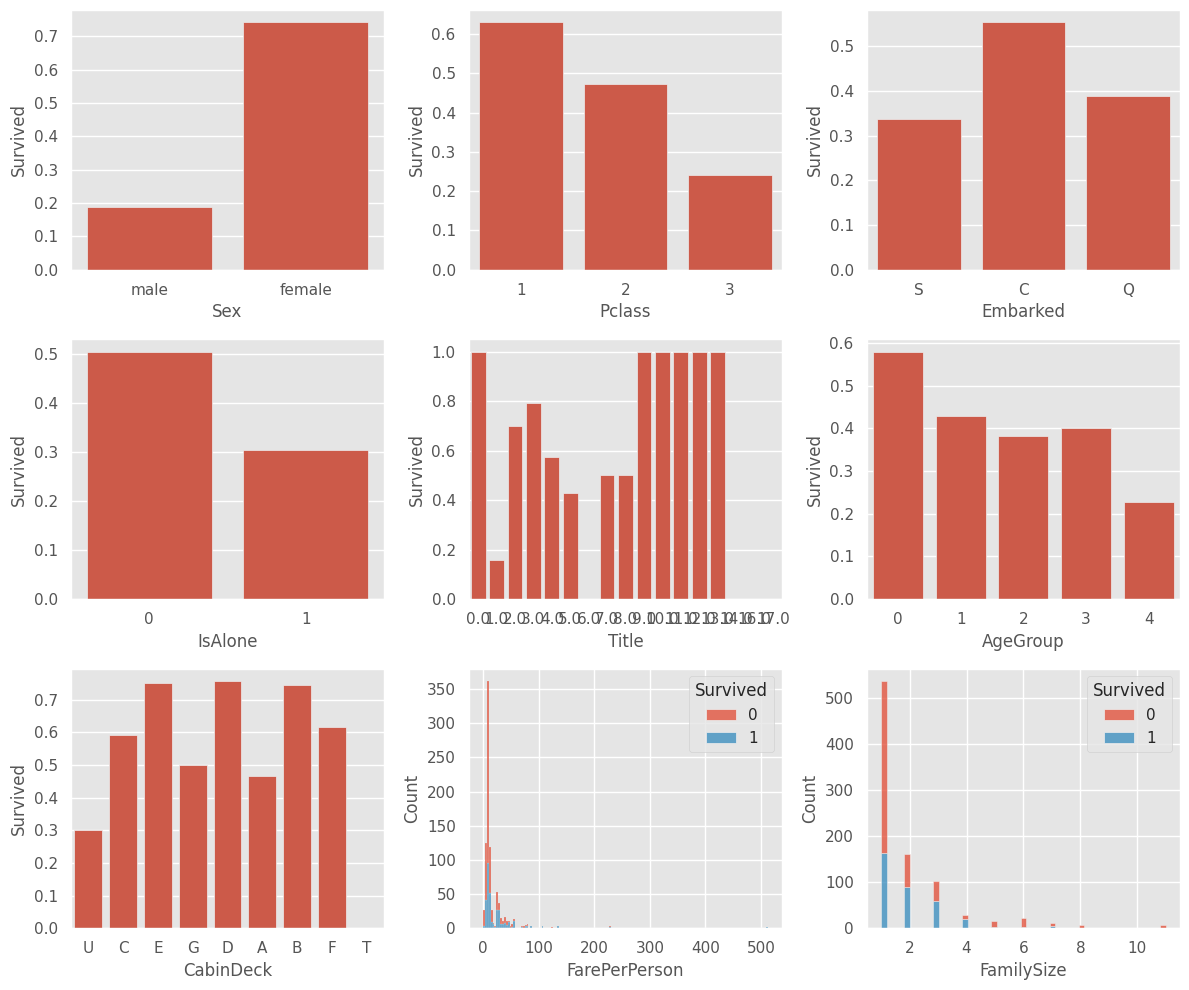

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
plt.subplot(3, 3, 1)
sns.barplot(x='Sex', y='Survived', data=df, errorbar=None)
plt.subplot(3, 3, 2)
sns.barplot(x='Pclass', y='Survived', data=df, errorbar=None)
plt.subplot(3, 3, 3)
sns.barplot(x='Embarked', y='Survived', data=df, errorbar=None)
plt.subplot(3, 3, 4)
sns.barplot(x='IsAlone', y='Survived', data=df, errorbar=None)
plt.subplot(3, 3, 5)
sns.barplot(x='Title', y='Survived', data=df, errorbar=None)
plt.subplot(3, 3, 6)
sns.barplot(x='AgeGroup', y='Survived', data=df, errorbar=None)
plt.subplot(3, 3, 7)
sns.barplot(x='CabinDeck', y='Survived', data=df, errorbar=None)
plt.subplot(3, 3, 8)
sns.histplot(data=df, x='FarePerPerson', hue='Survived', multiple='stack')
plt.subplot(3, 3, 9)
sns.histplot(data=df, x='FamilySize', hue='Survived', multiple='stack')
plt.tight_layout()
plt.show()

# Save the processed dataset
df.to_csv('titanic_processed.csv', index=False)


# **Feature Transformation**

In [48]:
# Log transformation of Fare
df['Fare_log'] = np.log(df['Fare'] + 1)  # Adding 1 to handle zero fares


In [49]:
# Square root transformation of Age
df['Age_sqrt'] = np.sqrt(df['Age'])


# **Normalization**

In [50]:
# Min-Max normalization of Fare
scaler = MinMaxScaler()
df['Fare_minmax'] = scaler.fit_transform(df[['Fare']])


In [51]:
# Z-score normalization of Age
scaler = StandardScaler()
df['Age_zscore'] = scaler.fit_transform(df[['Age']])


In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


# **Standardization**

In [53]:
# Standardization of Fare using StandardScaler
scaler = StandardScaler()
df['Fare_standardized'] = scaler.fit_transform(df[['Fare']])


In [54]:
# Standardization of Age using RobustScaler (handles outliers better)
scaler = RobustScaler()
df['Age_robust'] = scaler.fit_transform(df[['Age']])


# DATA PROCESSING AND MACHINE LEARNING MODEL

In [99]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature matrix and 'y' is your target variable
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']  # Target variable

# First split: 70% training and 30% remaining (test + validation)
X_train, X_remain, y_train, y_remain = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: Divide the remaining 30% into test and validation (20% test, 10% validation)
test_ratio = 2/3  # 20% of the original data (30% remaining) is for testing
X_test, X_val, y_test, y_val = train_test_split(X_remain, y_remain, test_size=test_ratio, random_state=42)

# Print the sizes of each set
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")


Training set: (623, 23), (623,)
Test set: (89, 23), (89,)
Validation set: (179, 23), (179,)


In [101]:
# List of columns to remove
columns_to_remove = ['Cabin', 'AgeGroup','Embarked']

# Remove columns from X_train
X_train = X_train.drop(columns_to_remove, axis=1)

# Remove columns from X_test
X_test = X_test.drop(columns_to_remove, axis=1)

# Remove columns from X_val
X_val = X_val.drop(columns_to_remove, axis=1)

# Check if columns are removed
print(X_train.columns)
print(X_test.columns)
print(X_val.columns)

# Check for any remaining missing values after removal
print(X_train.isnull().sum())
print(X_test.isnull().sum())
print(X_val.isnull().sum())


KeyError: "['Cabin', 'AgeGroup', 'Embarked'] not found in axis"

In [88]:
from sklearn.impute import SimpleImputer

# Identify numerical columns (assuming 'numeric_cols' are already defined)
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Impute numerical columns with mean
imputer_numeric = SimpleImputer(strategy='mean')
X_train[numeric_cols] = imputer_numeric.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = imputer_numeric.transform(X_test[numeric_cols])
X_val[numeric_cols] = imputer_numeric.transform(X_val[numeric_cols])
# Verify if there are any remaining missing values
print(X_train.isnull().sum())
print()
print(X_test.isnull().sum())
print()
print(X_val.isnull().sum())

PassengerId          0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Embarked             1
FamilySize           0
IsAlone              0
Title                0
FarePerPerson        0
CabinDeck            0
Fare_log             0
Age_sqrt             0
Fare_minmax          0
Age_zscore           0
Fare_standardized    0
Age_robust           0
dtype: int64

PassengerId          0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Embarked             0
FamilySize           0
IsAlone              0
Title                0
FarePerPerson        0
CabinDeck            0
Fare_log             0
Age_sqrt             0
Fare_minmax          0
Age_zscore           0
Fare_standardized    0
Age_robust           0
dtype: int64

Passen

In [93]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
X_val.columns = X_val.columns.astype(str)




In [96]:
# Random Forest Regression
model_rfr = RandomForestRegressor(random_state=42)
model_rfr.fit(X_train, y_train)

# Predictions
y_pred_train_rfr = model_rfr.predict(X_train)
y_pred_test_rfr = model_rfr.predict(X_test)
y_pred_val_rfr = model_rfr.predict(X_val)

# Metrics
accuracy_train_rfr = model_rfr.score(X_train, y_train)
accuracy_test_rfr = model_rfr.score(X_test, y_test)
accuracy_val_rfr = model_rfr.score(X_val, y_val)
r2_rfr = r2_score(y_test, y_pred_test_rfr)
rmse_rfr = mean_squared_error(y_test, y_pred_test_rfr, squared=False)
classification_report_rfr = classification_report(y_test, y_pred_test_rfr)
conf_matrix_rfr = confusion_matrix(y_test, y_pred_test_rfr)
roc_auc_rfr = roc_auc_score(y_test, y_pred_test_rfr)
fpr_rfr, tpr_rfr, _ = roc_curve(y_test, y_pred_test_rfr)


ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values